In [2]:
import numpy as np
import pandas as pd
import os
import imageio.v2 as imageio
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Part A
train_data = pd.read_csv("train.txt")
test_data = pd.read_csv("test.txt")

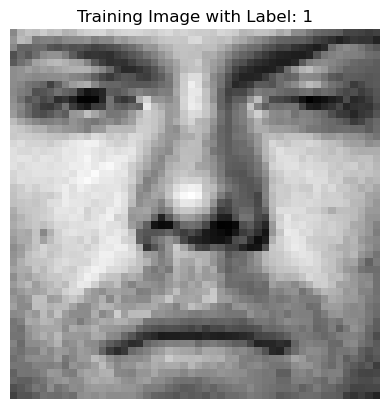

In [4]:
# Part B
train_labels, train_data = [], []

for line in open('train.txt'):
    file_path = os.path.join('images', os.path.basename(line.strip().split()[0]))
    
    if os.path.exists(file_path):
        im = imageio.imread(file_path)
        train_data.append(im.reshape(2500,))
        train_labels.append(line.strip().split()[1])
    else:
        print(f"File not found: {file_path}")

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title(f'Training Image with Label: {train_labels[10]}')
plt.axis('off')
plt.show()


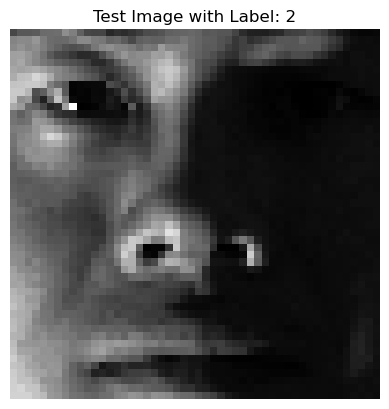

In [5]:
# Part B for test
test_labels, test_data = [], []

for line in open('test.txt'):
    file_path = os.path.join('images', os.path.basename(line.strip().split()[0]))
    
    if os.path.exists(file_path):
        im = imageio.imread(file_path)
        test_data.append(im.reshape(2500,)) 
        test_labels.append(line.strip().split()[1]) 
    else:
        print(f"File not found: {file_path}")

test_data = np.array(test_data, dtype=float)
test_labels = np.array(test_labels, dtype=int)

if len(test_data) > 10:  
    plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
    plt.title(f'Test Image with Label: {test_labels[10]}')
    plt.axis('off')
    plt.show()
else:
    print("Not enough images to display the 11th image.")

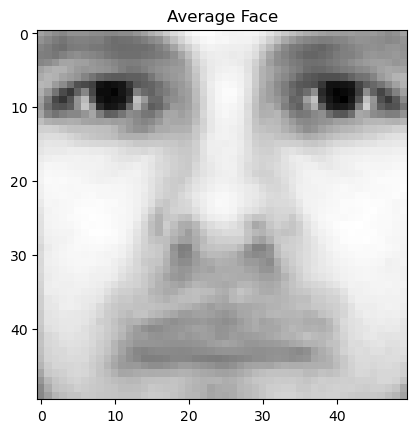

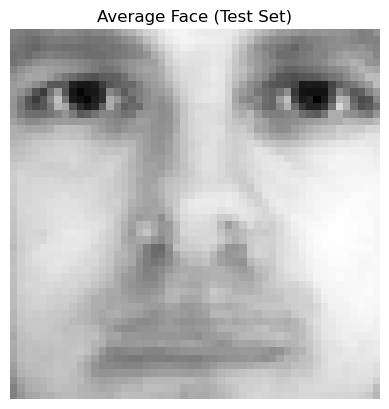

In [6]:
# Part C
face_sum = np.sum(train_data, axis=0)

num_faces = train_data.shape[0]
average_face = face_sum / num_faces

average_face_image = average_face.reshape(50, 50)

plt.imshow(average_face_image, cmap=cm.Greys_r)
plt.title("Average Face")
plt.show()

face_sum = np.sum(test_data, axis=0)

num_faces = test_data.shape[0]
average_face = face_sum / num_faces

average_face_image = average_face.reshape(50, 50)

plt.imshow(average_face_image, cmap=cm.Greys_r)
plt.title("Average Face (Test Set)")
plt.axis('off')  # Optional: Turn off axis display
plt.show()

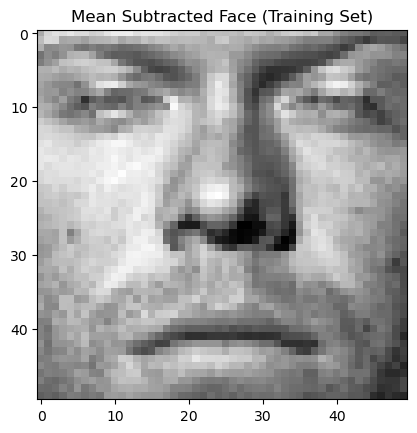

In [7]:
# Part D
mean_subtracted_train_data = train_data - average_face

mean_subtracted_face = mean_subtracted_train_data[10, :].reshape(50, 50)

plt.imshow(mean_subtracted_face, cmap=cm.Greys_r)
plt.title("Mean Subtracted Face (Training Set)")
plt.show()

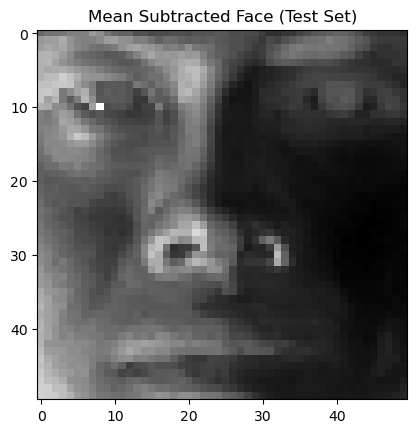

In [8]:
# Part D for test
mean_subtracted_test_data = test_data - average_face

mean_subtracted_test_face = mean_subtracted_test_data[10, :].reshape(50, 50)

plt.imshow(mean_subtracted_test_face, cmap=cm.Greys_r)
plt.title("Mean Subtracted Face (Test Set)")
plt.show()

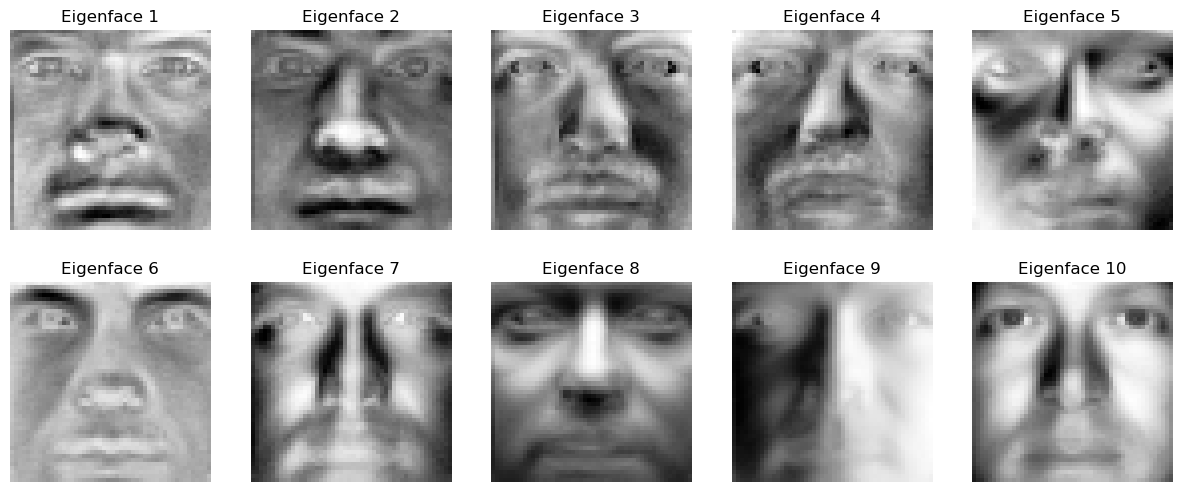

In [9]:
# Part E
cov_matrix = np.dot(mean_subtracted_train_data.T, mean_subtracted_train_data)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Since np.linalg.eigh returns eigenvalues in ascending order, we need to reverse it
top_10_eigenvectors = eigenvectors[:, -10:]

plt.figure(figsize=(15, 6))
for i in range(10):
    eigenface = top_10_eigenvectors[:, i].reshape(50, 50)
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface, cmap=cm.Greys_r)
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')

plt.show()

In [10]:
# Part F
def generate_eigenface_features(train_data, test_data, top_eigenvectors, r):
    V_r = top_eigenvectors[:, -r:]  # Shape: (2500, r)

    F_train = np.dot(train_data, V_r)  # Shape: (n_samples, r)
    
    F_test = np.dot(test_data, V_r)  # Shape: (n_test_samples, r)
    
    return F_train, F_test

r = 10  

F_train, F_test = generate_eigenface_features(train_data, test_data, top_10_eigenvectors, r)


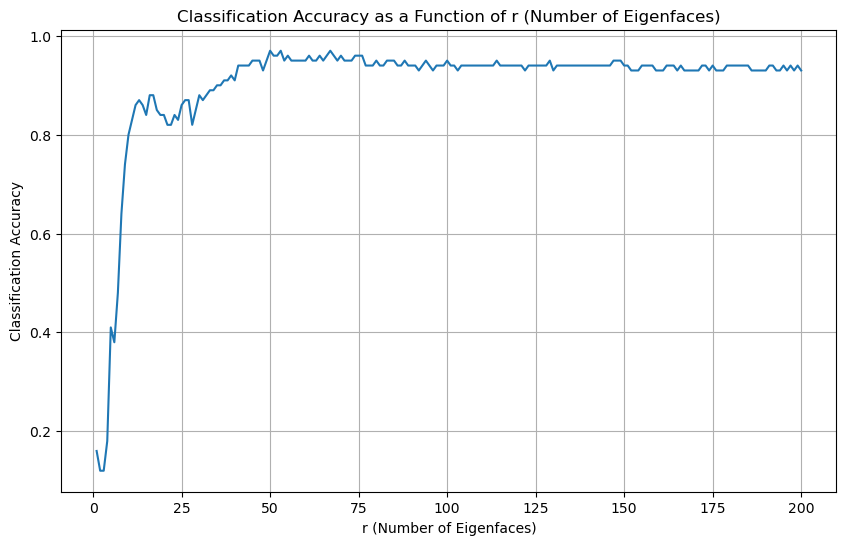

Classification accuracy at r=10: 0.8000


In [11]:
# Part G 
accuracies = []

for r in range(1, 201):
    F_train_r, F_test_r = generate_eigenface_features(train_data, test_data, eigenvectors, r)
    
    logreg = LogisticRegression(C=1e5, multi_class='ovr', max_iter=10000)
    logreg.fit(F_train_r, train_labels)
    
    accuracy = logreg.score(F_test_r, test_labels)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), accuracies)
plt.title('Classification Accuracy as a Function of r (Number of Eigenfaces)')
plt.xlabel('r (Number of Eigenfaces)')
plt.ylabel('Classification Accuracy')
plt.grid(True)
plt.show()

r_10_accuracy = accuracies[9] 
print(f'Classification accuracy at r=10: {r_10_accuracy:.4f}')

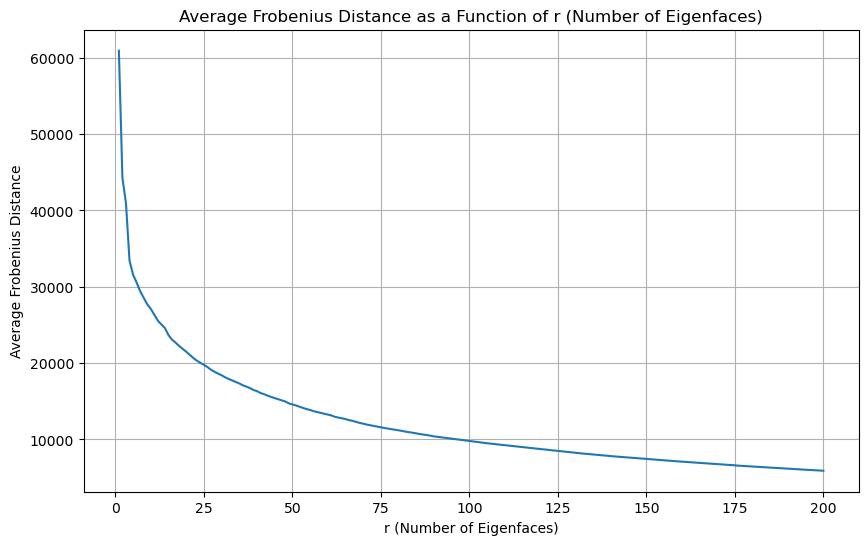

In [12]:
# Part H
def reconstruct_and_calculate_frobenius(train_data, top_eigenvectors, r):
    V_r = top_eigenvectors[:, -r:]  
    F_train = np.dot(train_data, V_r)  

    X_reconstructed = np.dot(F_train, V_r.T) 

    diff = train_data - X_reconstructed
    frobenius_dist = np.sqrt(np.trace(np.dot(diff.T, diff)))  
    return frobenius_dist

frobenius_distances = []

for r in range(1, 201):
    frobenius_dist = reconstruct_and_calculate_frobenius(train_data, eigenvectors, r)
    frobenius_distances.append(frobenius_dist)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), frobenius_distances)
plt.title('Average Frobenius Distance as a Function of r (Number of Eigenfaces)')
plt.xlabel('r (Number of Eigenfaces)')
plt.ylabel('Average Frobenius Distance')
plt.grid(True)
plt.show()

In [13]:
F_train.shape

(540, 10)